In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [7]:
current_directory = os.getcwd()

print(f"Estás trabajando en el directorio: {current_directory}")

Estás trabajando en el directorio: C:\Users\JIMDGO12\LungCancer


In [14]:
data = pd.read_csv("lung_cancer_examples.csv")
data.drop(['Name','Surname'],axis=1, inplace=True)

In [15]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     59 non-null     int64
 1   Smokes  59 non-null     int64
 2   AreaQ   59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [17]:
data.isnull().sum()

Age       0
Smokes    0
AreaQ     0
Alkhol    0
Result    0
dtype: int64

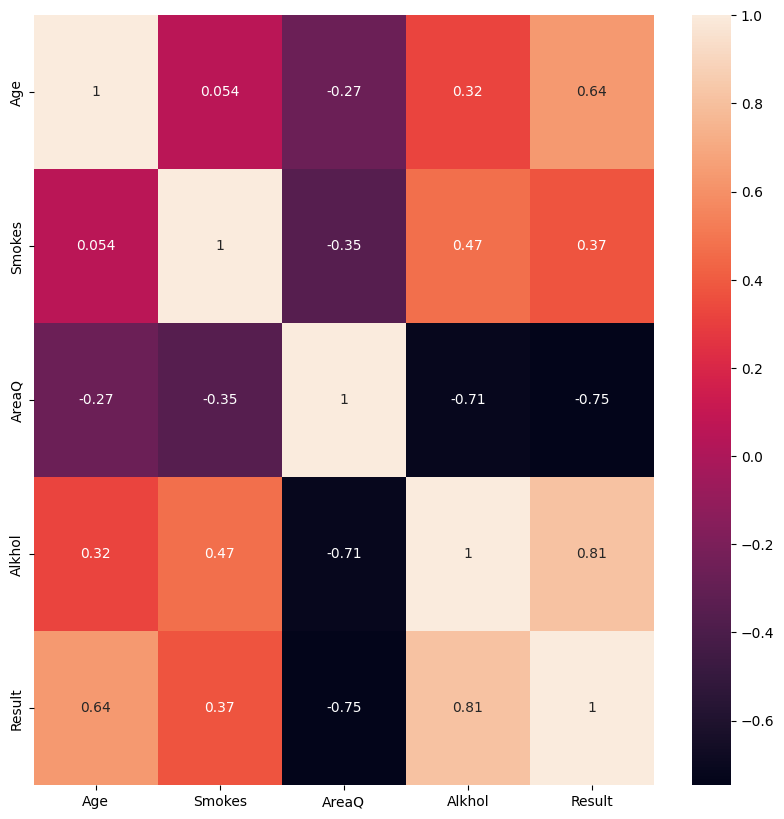

In [18]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True)
plt.show()

In [19]:
X=data.drop(['Result'],axis='columns')
y=data['Result']
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.3)

In [20]:
#Estimando modelos
modelLR=LogisticRegression()
modelLR.fit(X_train,y_train)
predict1=modelLR.predict(X_test)
print(predict1)


[0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1]


In [21]:
modelRFC=RandomForestClassifier()
modelRFC.fit(X_train,y_train)
predict2=modelRFC.predict(X_test)

In [22]:
print("Con logistic Regression")
print(confusion_matrix(y_test,predict1))
print(classification_report(y_test,predict1))
print("Random Forest Classifier")
print(confusion_matrix(y_test,predict2))
print(classification_report(y_test,predict2))

Con logistic Regression
[[ 8  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Random Forest Classifier
[[ 8  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [23]:
probando=pd.DataFrame([[15,4,6,0]],columns=['Age','Smokes','AreaQ','Alkhol'])
print('Tu resultado es', modelRFC.predict(probando))

Tu resultado es [0]
